# Here we postprocess the output of qfm_ncsx_example.py

In [1]:
import numpy as np
from pyplasmaopt import *
from pyplasmaopt.qfm_surface import QfmSurface
import matplotlib.pyplot as plt
from vmec_output import VmecOutput
from pyplasmaopt.poincareplot import compute_field_lines

Nt_ma = 6
Nt_coils = 6
ppp = 20
volume = 1.0 # Target volume
nfp = 3
mmax = 3 # maximum poloidal mode number for surface
nmax = 3 # maximum toroidal mode number for surface
ntheta = 100 # number of poloidal grid points for integration
nphi = 100 # number of toroidal grid points for integration

(coils, ma, currents) = get_ncsx_data(Nt_ma=Nt_ma, Nt_coils=Nt_coils, ppp=ppp)
stellarator = CoilCollection(coils, currents, nfp, True)
bs = BiotSavart(stellarator.coils, stellarator.currents)

# Plot QFM surfaces

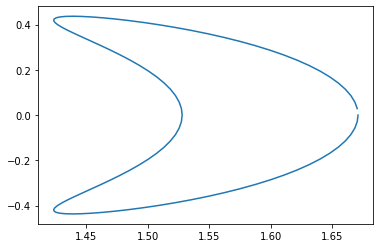

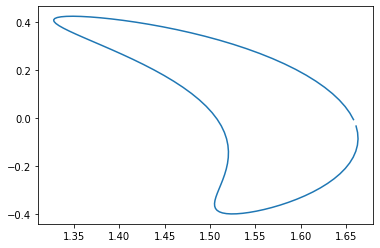

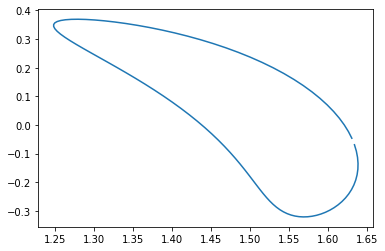

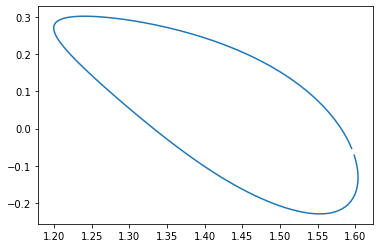

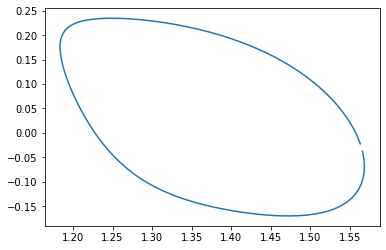

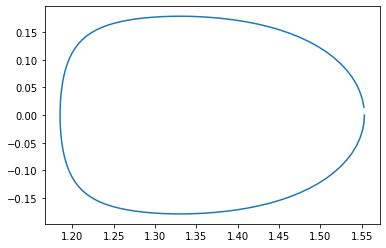

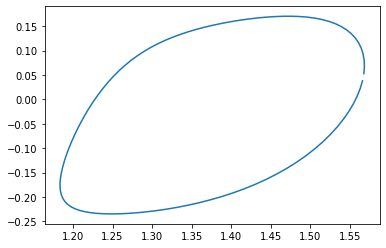

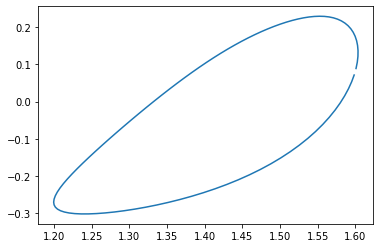

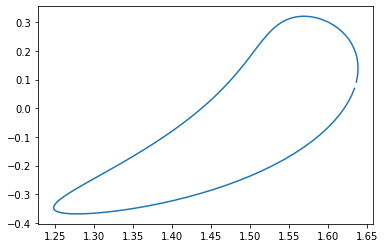

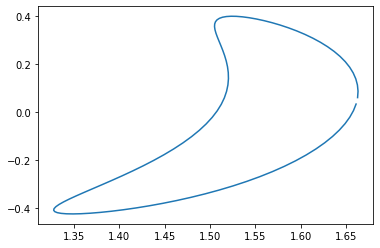

In [2]:
qfm = QfmSurface(mmax, nmax, nfp, bs, ntheta, nphi, volume)

params = np.loadtxt('xopt.txt')
R,Z = qfm.position(params)

for iphi in range(0,100,10):
    fig = plt.figure()
    plt.plot(R[iphi,:],Z[iphi,:])

# Save boundary to file

In [3]:
Rbc, Zbs = qfm.ft_surface(params,3,3)

# Compute Poincare sections

In [9]:
nperiods = 200
magnetic_axis_radius=1.5908

spp = 120
rphiz, xyz, absB, phi_no_mod = compute_field_lines(bs, nperiods=nperiods, batch_size=4, magnetic_axis_radius=magnetic_axis_radius, max_thickness=0.9, delta=0.01, steps_per_period=spp)
nparticles = rphiz.shape[0]

1.5908 to 1.6208 -> success
1.6308 to 1.6608 -> success
1.6708 to 1.7007999999999999 -> success
1.7107999999999999 to 1.7408 -> success
1.7508 to 1.7808 -> fail
1.7908 to 1.8208 -> fail
1.8308 to 1.8608 -> fail
1.8708 to 1.9008 -> fail
1.9108 to 1.9408 -> fail
1.9508 to 1.9808000000000001 -> fail
1.9908000000000001 to 2.0208000000000004 -> fail
2.0308 to 2.0608000000000004 -> fail
2.0708 to 2.1008000000000004 -> fail
2.1108000000000002 to 2.1408000000000005 -> fail
2.1508000000000003 to 2.1808 -> fail
2.1908 to 2.2207999999999997 -> fail
2.2308 to 2.2607999999999997 -> fail
2.2708 to 2.3007999999999997 -> fail
2.3108 to 2.3407999999999998 -> fail
2.3508 to 2.3808 -> fail
2.3908 to 2.4208 -> fail
2.4308 to 2.4608 -> fail


# Plot Poincare section with QFM surface

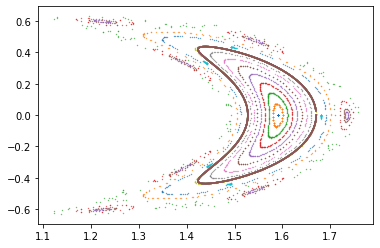

In [13]:
data0 = np.zeros((nperiods, nparticles*2))
data1 = np.zeros((nperiods, nparticles*2))
data2 = np.zeros((nperiods, nparticles*2))
data3 = np.zeros((nperiods, nparticles*2))
for i in range(nparticles):
    data0[:, 2*i+0] = rphiz[i, range(0, nperiods*spp, spp), 0]
    data0[:, 2*i+1] = rphiz[i, range(0, nperiods*spp, spp), 2]
    data1[:, 2*i+0] = rphiz[i, range(1*spp//(nfp*4), nperiods*spp, spp), 0]
    data1[:, 2*i+1] = rphiz[i, range(1*spp//(nfp*4), nperiods*spp, spp), 2]
    data2[:, 2*i+0] = rphiz[i, range(2*spp//(nfp*4), nperiods*spp, spp), 0]
    data2[:, 2*i+1] = rphiz[i, range(2*spp//(nfp*4), nperiods*spp, spp), 2]
    data3[:, 2*i+0] = rphiz[i, range(3*spp//(nfp*4), nperiods*spp, spp), 0]
    data3[:, 2*i+1] = rphiz[i, range(3*spp//(nfp*4), nperiods*spp, spp), 2]
    
plt.figure()
for i in range(nparticles):
    plt.scatter(rphiz[i, range(0, nperiods*spp, spp), 0], rphiz[i, range(0, nperiods*spp, spp), 2], s=0.1)
    plt.plot(R[0,:],Z[0,:])